In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from function import relative_permeabilities as rp
from function import phase_permeabilities as pp
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
#importing dataset using pandas for read csv file
data_flowrate = pd.read_csv("data\Table 1.0 Flowrates Example.csv")
data_flowrate

,sw,qo,qw
0,0.00,0.0600,0.000
1,0.20,0.0420,0.000
2,0.30,0.0300,0.010
3,0.40,0.0200,0.020
4,0.50,0.0130,0.035
5,0.60,0.0075,0.051
6,0.70,0.0040,0.068
7,0.80,0.0010,0.085
8,0.85,0.0000,0.096
9,1.00,0.0000,0.250


In [3]:
#calculating realtive permeabilities
calculating_relative = rp.calculate(dataframe=data_flowrate)
calculating_phase = pp.calculate(dataframe=calculating_relative, mu_oil= 5.0, mu_water= 1.2,
                                 core_area=5.0, dP=2.5, core_length=12.0)


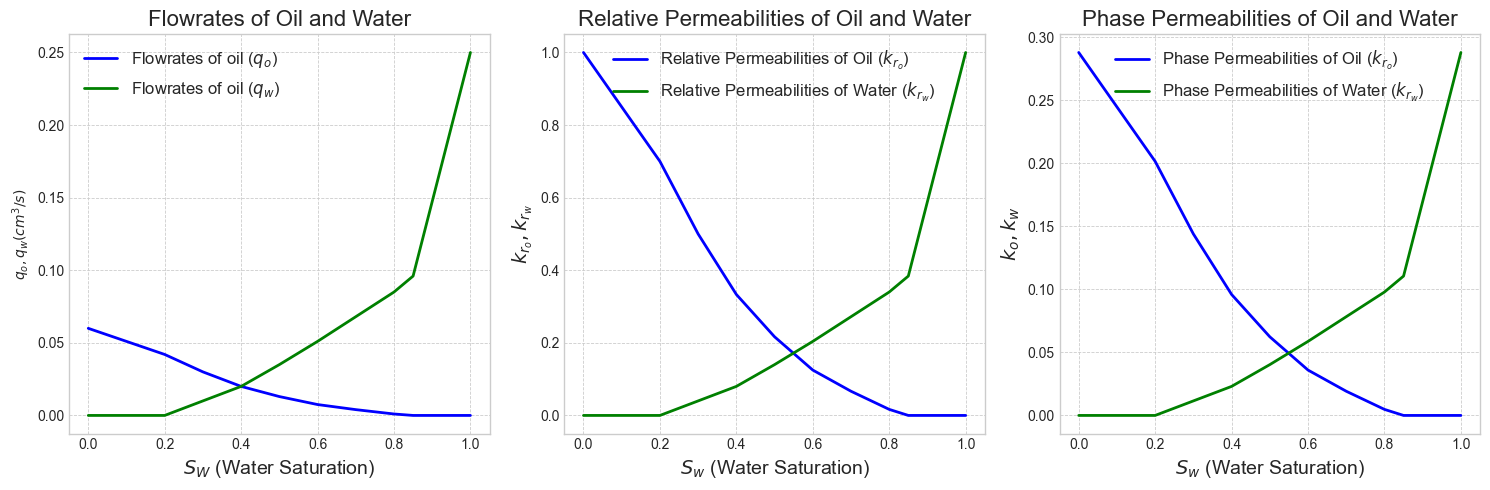

In [4]:
final_data = calculating_phase

#plotting data
plt.style.use('seaborn-whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), dpi=100)

#Plot the flowrate of Oil and Water
ax1.plot(final_data['sw'], final_data['qo'], label=r'Flowrates of oil ($q_o$)', linewidth=2, color='blue')
ax1.plot(final_data['sw'], final_data['qw'], label=r'Flowrates of oil ($q_w$)', linewidth=2, color='green')
ax1.set_xlabel(r'$S_W$ (Water Saturation)', fontsize=14)
ax1.set_ylabel(r'$q_o, q_w (cm^3/s)$')
ax1.grid(True, which='both', linestyle='--', linewidth=0.6)
ax1.legend(fontsize=12, loc='best')
ax1.set_title("Flowrates of Oil and Water", fontsize=16)

#Plot the relative permeabilities
ax2.plot(final_data['sw'], final_data['kr_o'], label=r'Relative Permeabilities of Oil ($k_{r_o}$)', linewidth=2, color='blue')
ax2.plot(final_data['sw'], final_data['kr_w'], label=r'Relative Permeabilities of Water ($k_{r_w}$)', linewidth=2, color='green')
ax2.set_xlabel(r'$S_w$ (Water Saturation)', fontsize=14)
ax2.set_ylabel(r'$k_{r_o}, k_{r_w}$', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.6)
ax2.legend(fontsize=12, loc='best')
ax2.set_title("Relative Permeabilities of Oil and Water", fontsize=16)

#Plot the Phase Permeabilities of Oil and Water
ax3.plot(final_data['sw'], final_data['k_o'], label=r'Phase Permeabilities of Oil ($k_{r_o}$)', linewidth=2, color='blue')
ax3.plot(final_data['sw'], final_data['k_w'], label=r'Phase Permeabilities of Water ($k_{r_w}$)', linewidth=2, color='green')
ax3.set_xlabel(r'$S_w$ (Water Saturation)', fontsize=14)
ax3.set_ylabel(r'$k_o, k_w$', fontsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.6)
ax3.legend(fontsize=12, loc='best')
ax3.set_title("Phase Permeabilities of Oil and Water", fontsize=16)

fig.tight_layout()
#fig.savefig("Reservoir Engineering Series\Rock and Fluid Properties\output\Permeabilities of Oil and Water.png", dpi=100)

plt.show()